<center>
    <h1> INF477 - Redes Neuronales Artificiales  </h1>
    <h2> Tarea #1: Perceptrones Multicapa o Redes FF </h2> 
</center>

Tarea realizada por:
* Alvaro Salinas - `alvaro.salinase@gmail.com` - **rol:** 201073001-8
* Martín Villanueva - `martin.villanueva@alumnos.usm.cl` - **rol:** 201104012-0

_DI UTFSM. Septiembre 2016._

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

## Table de Contenidos
* [El XOR](#xor)
    * [Parte a)](#a)
    * [Parte b)](#b)
    * [Parte c)](#c)
* [Predicción del precio de una casa](#pred)
* [Reconocimiento de imágenes en CIFAR10](#rec)


<div id='xor' />
## 1.-  El XOR

<div id='a' />
### Parte a)

In [251]:
# for reproducibility of experiments
np.random.seed(2)

def xor_generator(m):
    """
    m: number of points to generate
    """
    # generate m random points on [-1,1]x[-1,1]
    X = 2.*np.random.random(m)-1.
    Y = 2.*np.random.random(m)-1. 
    
    # arrangement to cluster the points
    x_mask = X>0.
    y_mask = Y>0.
    X[x_mask] *= 0.8; X[x_mask] += 0.1
    X[~x_mask] *= 0.8; X[~x_mask] -= 0.1
    Y[y_mask] *= 0.8; Y[y_mask] += 0.1
    Y[~y_mask] *= 0.8; Y[~y_mask] -= 0.1    
    XY = np.vstack([X,Y]).T
    
    # generating the labels
    y = np.zeros(m, dtype=np.int)
    mask = np.multiply.reduce(XY, axis=1) > 0.
    y[mask] = 1
    return (XY, y)

def xor_plot(X,y):
    X0 = X[y==0]
    X1 = X[y==1]
    plt.figure(figsize=(7,7))
    plt.scatter(X0[:,0], X0[:,1], c='b')
    plt.scatter(X1[:,0], X1[:,1], c='r')
    plt.plot((-1.1,1.1),(0,0),'k--')
    plt.plot((0,0),(-1.1,1.1),'k--')
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    plt.show()

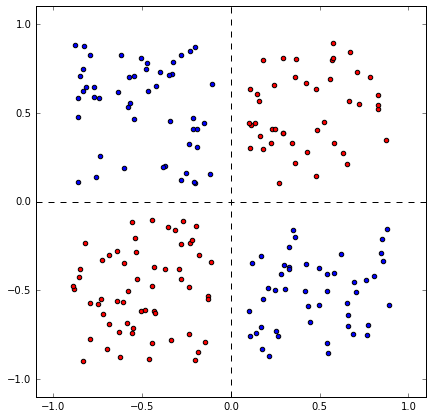

In [252]:
X,y = xor_generator(200)
xor_plot(X,y)

<div id='b' />
### Parte b)

In [253]:
model0 = Sequential()
model0.add(Dense(output_dim=1, input_dim=2, activation='sigmoid', init='normal'))
#model0.add(Dense(output_dim=1, activation='softmax'))
model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model0.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [254]:
model0.fit(X, y, nb_epoch=200, verbose=0)

In [255]:
scores = model0.evaluate(X,y)
print("\n{0}: {1}%".format(model0.metrics_names[1], scores[1]*100))

 32/200 [===>..........................] - ETA: 0s
acc: 46.5%


<div id='c' />
### Parte c)

In [259]:
model1 = Sequential()
#model1.add(Dense(output_dim=10, input_dim=2, activation='relu', init='normal'))
model1.add(Dense(output_dim=10, input_dim=2, activation='tanh', init='normal'))
model1.add(Dense(output_dim=1, init='normal', activation='sigmoid'))
#model0.add(Dense(output_dim=1, activation='softmax'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model0.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model1.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [260]:
model1.fit(X, y, nb_epoch=1000, verbose=0)

In [261]:
scores = model1.evaluate(X,y)
print("\n{0}: {1}%".format(model1.metrics_names[1], scores[1]*100))

 32/200 [===>..........................] - ETA: 0s
acc: 100.0%


<div id='pred' />
## 2.-  Predicción del precio de una casa

<div id='rec' />
## 3.-  Reconocimiento de imágenes en CIFAR10